# Diagnostic Test

1) Repeat the training and evaluation of the kNN algorithm, but now testing different values for the number of neighbors.

2) Plot the accuracy for the test set together with another metric of your choice - check scikit for evaluation metrics.

3) Save the figure, comment the results and submit on Fénix by Saturday September 13th at 23:59 - **limit is one page for the figure + comments!**

In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, f1_score

In [3]:
digits=load_digits()

In [4]:
#Separate the data into training and test for model evaluation
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=42) 

In [ ]:
k_values = []
accuracies = []
precisions = []

for k in range(1,600):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    print("K =",k," Accuracy:", round(accuracy,4) ," Precision:", round(precision,4))
    k_values.append(k)
    accuracies.append(accuracy)
    precisions.append(precision)

K = 1  Accuracy: 0.9848  Precision: 0.985
K = 2  Accuracy: 0.9848  Precision: 0.9851
K = 3  Accuracy: 0.9899  Precision: 0.9899
K = 4  Accuracy: 0.9882  Precision: 0.9885
K = 5  Accuracy: 0.9933  Precision: 0.9933
K = 6  Accuracy: 0.9933  Precision: 0.9934
K = 7  Accuracy: 0.9899  Precision: 0.9899
K = 8  Accuracy: 0.9865  Precision: 0.9869
K = 9  Accuracy: 0.9798  Precision: 0.9802
K = 10  Accuracy: 0.9832  Precision: 0.9835
K = 11  Accuracy: 0.9781  Precision: 0.9783
K = 12  Accuracy: 0.9781  Precision: 0.9785
K = 13  Accuracy: 0.9781  Precision: 0.9785
K = 14  Accuracy: 0.9781  Precision: 0.9785
K = 15  Accuracy: 0.9764  Precision: 0.9768
K = 16  Accuracy: 0.9764  Precision: 0.9768
K = 17  Accuracy: 0.9747  Precision: 0.9751
K = 18  Accuracy: 0.9747  Precision: 0.9752
K = 19  Accuracy: 0.9731  Precision: 0.9734
K = 20  Accuracy: 0.9747  Precision: 0.9751
K = 21  Accuracy: 0.968  Precision: 0.9682
K = 22  Accuracy: 0.9731  Precision: 0.9734
K = 23  Accuracy: 0.9714  Precision: 0.9716

In [26]:
best_acc = max(accuracies)
best_prec = max(precisions)
best_k_acc = k_values[accuracies.index(best_acc)]
best_k_prec = k_values[precisions.index(best_prec)]

print("Best accuracy was", best_acc, ", for k =", best_k_acc)
print("Best precision was", best_prec, ", for k =", best_k_prec)

Best accuracy was 0.9932659932659933 , for k = 5
Best precision was 0.9933742409619603 , for k = 6


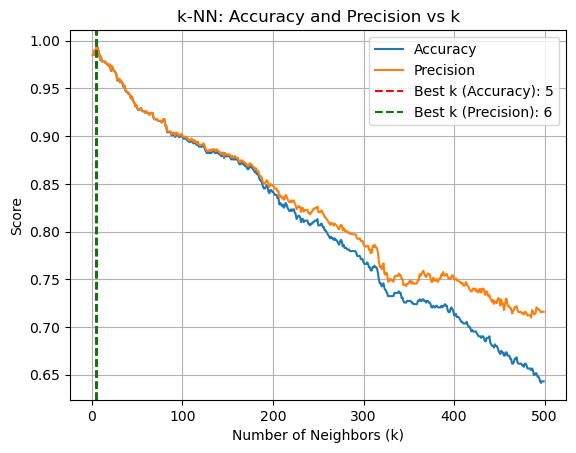

In [30]:
plt.plot(k_values, accuracies, label='Accuracy')
plt.plot(k_values, precisions, label='Precision')
plt.axvline(x = best_k_acc, color='r', linestyle='--', label=f'Best k (Accuracy): {best_k_acc}')
plt.axvline(x = best_k_prec, color='g', linestyle='--', label=f'Best k (Precision): {best_k_prec}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('k-NN: Accuracy and Precision vs k')
plt.legend()
plt.grid(True)
plt.show()

For k = 6 , f1 score is 0.9932281442043835


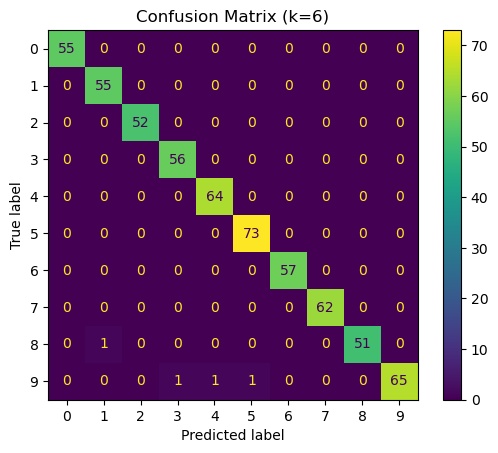

For k = 500 , f1 score is 0.6166898912224118


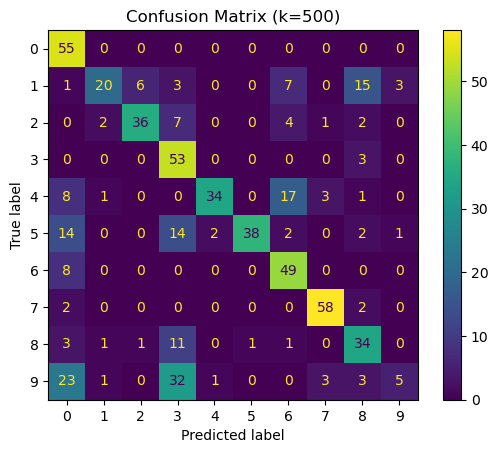

In [39]:
k_values = [6,500]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=digits.target_names)
    f1_score_k = f1_score(y_test, y_pred, average='weighted')
    print("For k =", k, ", f1 score is", f1_score_k)

    matrix.ax_.set_title(f"Confusion Matrix (k={k})")
    plt.show()